<small>
Copyright (c) 2017 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning From Basics to Practice
## by Andrew Glassner, https://dlbasics.com, http://glassner.com
------
## Chapter 12: Data Preparation
### Notebook 1: Showing normalizations, PCA, etc.

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is still in the hacked-together form used to develop the figures, and is only lightly commented.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Make a File_Helper for saving and loading files.

save_files = True

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

Using TensorFlow backend.


In [3]:
# The following cells are intended to be executed
# serially, since they build new data as they go
# based on previous data held in global variables.

In [4]:
# Points for the electric guitar dataset

points_list = np.array([
[ 0.14343707, 0.8876861 ], [ 0.086603515, 0.84032476 ], [ 0.1014885, 0.9093369 ],
[ 0.21244925, 0.77943164 ], [ 0.2503383, 0.91745603 ], [ 0.24763194, 0.8362652 ],
[ 0.21244925, 0.87280107 ], [ 0.13396482, 0.84573746 ], [ 0.16508795, 0.95805144 ],
[ 0.17185386, 0.9066306 ], [ 0.1217862, 0.93098783 ], [ 0.07577808, 0.94316643 ],
[ 0.054127198, 0.8958051 ], [ 0.24763194, 0.744249 ], [ 0.26928282, 0.76860625 ],
[ 0.29499322, 0.80784845 ], [ 0.25845736, 0.79566985 ], [ 0.20838971, 0.8362652 ],
[ 0.27198917, 0.8579161 ], [ 0.30175912, 0.84573746 ], [ 0.3044655, 0.8755074 ],
[ 0.27604872, 0.8849797 ], [ 0.27469555, 0.9201624 ], [ 0.21650879, 0.9188092 ],
[ 0.21921515, 0.95128554 ], [ 0.25169146, 0.94993234 ], [ 0.07848444, 0.864682 ],
[ 0.18132612, 0.83491206 ], [ 0.1894452, 0.8890392 ], [ 0.1894452, 0.9729364 ],
[ 0.15155616, 0.93775374 ], [ 0.09336942, 0.96346414 ], [ 0.12990528, 0.96481735 ],
[ 0.113667116, 0.8849797 ], [ 0.09336942, 0.93098783 ], [ 0.046008117, 0.9255751 ],
[ 0.031123139, 0.87415427 ], [ 0.03924222, 0.8254398 ], [ 0.0608931, 0.8173207 ],
[ 0.086603515, 0.78890395 ], [ 0.119079836, 0.78213805 ], [ 0.15832205, 0.80108255 ],
[ 0.17185386, 0.7699594 ], [ 0.23139377, 0.76184034 ], [ 0.22868742, 0.8037889 ],
[ 0.23139377, 0.85926926 ], [ 0.27198917, 0.8294993 ], [ 0.24221921, 0.8903924 ],
[ 0.19485791, 0.932341 ], [ 0.135318, 0.9079838 ], [ 0.113667116, 0.8579161 ],
[ 0.05277402, 0.84709066 ], [ 0.09607578, 0.8186739 ], [ 0.07713126, 0.8958051 ],
[ 0.16102841, 0.86738837 ], [ 0.19350474, 0.80108255 ], [ 0.13937753, 0.8159675 ],
[ 0.062246278, 0.78078485 ], [ 0.0879567, 0.7523681 ], [ 0.1217862, 0.75372124 ],
[ 0.24086604, 0.6738836 ], [ 0.25169146, 0.6414073 ], [ 0.21380244, 0.7198917 ],
[ 0.22868742, 0.744249 ], [ 0.19891746, 0.74830854 ], [ 0.18673883, 0.7239513 ],
[ 0.16508795, 0.729364 ], [ 0.124492556, 0.7185386 ], [ 0.1488498, 0.744249 ],
[ 0.10554804, 0.7388363 ], [ 0.108254395, 0.7023004 ], [ 0.15155616, 0.7036536 ],
[ 0.19350474, 0.6955345 ], [ 0.22868742, 0.6941813 ], [ 0.2300406, 0.65223277 ],
[ 0.20974289, 0.6752368 ], [ 0.19756427, 0.6481732 ], [ 0.1894452, 0.6738836 ],
[ 0.15696888, 0.6738836 ], [ 0.135318, 0.6752368 ], [ 0.16779432, 0.64952636 ],
[ 0.13802436, 0.65629226 ], [ 0.10554804, 0.6752368 ], [ 0.10554804, 0.64952636 ],
[ 0.08389716, 0.65629226 ], [ 0.07171854, 0.63734776 ], [ 0.0879567, 0.6265223 ],
[ 0.1217862, 0.6332882 ], [ 0.16102841, 0.6332882 ], [ 0.18673883, 0.62516916 ],
[ 0.16914749, 0.61163735 ], [ 0.16102841, 0.58998644 ], [ 0.14073072, 0.60622466 ],
[ 0.11096076, 0.6075778 ], [ 0.13396482, 0.5872801 ], [ 0.10013532, 0.58998644 ],
[ 0.07577808, 0.60487145 ], [ 0.15155616, 0.57239515 ], [ 0.16644114, 0.5615697 ],
[ 0.15832205, 0.53721243 ], [ 0.15696888, 0.511502 ], [ 0.16238159, 0.48173207 ],
[ 0.1556157, 0.47090665 ], [ 0.16102841, 0.44384304 ], [ 0.15290934, 0.4316644 ],
[ 0.15967524, 0.40324762 ], [ 0.15832205, 0.37077132 ], [ 0.15426251, 0.35453317 ],
[ 0.15967524, 0.3301759 ], [ 0.15696888, 0.2976996 ], [ 0.15696888, 0.26792964 ],
[ 0.16238159, 0.23951286 ], [ 0.15832205, 0.21380244 ], [ 0.15832205, 0.1826793 ],
[ 0.16238159, 0.14479026 ], [ 0.15155616, 0.119079836 ], [ 0.1759134, 0.1150203 ],
[ 0.15696888, 0.097428955 ], [ 0.17861976, 0.08930988 ], [ 0.17050068, 0.066305816 ],
[ 0.15426251, 0.07713126 ], [ 0.1556157, 0.05006766 ], [ 0.17726658, 0.05006766 ],
[ 0.17320703, 0.03247632 ], [ 0.15426251, 0.028416779 ], [ 0.17861976, 0.5223275 ],
[ 0.18132612, 0.4993234 ], [ 0.17861976, 0.47225982 ], [ 0.17861976, 0.44384304 ],
[ 0.17861976, 0.4127199 ], [ 0.17726658, 0.39106902 ], [ 0.1759134, 0.3653586 ],
[ 0.17456022, 0.33423546 ], [ 0.1759134, 0.30040595 ], [ 0.17456022, 0.27334234 ],
[ 0.17726658, 0.25304466 ], [ 0.17456022, 0.22192152 ], [ 0.17456022, 0.19485791 ],
[ 0.17185386, 0.1759134 ], [ 0.1759134, 0.1556157 ], [ 0.135318, 0.53315294 ],
[ 0.13802436, 0.5142084 ], [ 0.13802436, 0.4871448 ], [ 0.13802436, 0.46414074 ],
[ 0.13667117, 0.43572396 ], [ 0.13667117, 0.41001353 ], [ 0.13937753, 0.38159674 ],
[ 0.13937753, 0.36129904 ], [ 0.13802436, 0.32611638 ], [ 0.1420839, 0.29364005 ],
[ 0.14073072, 0.2638701 ], [ 0.14073072, 0.2368065 ], [ 0.14343707, 0.21786198 ],
[ 0.14343707, 0.1894452 ], [ 0.14479026, 0.1556157 ], [ 0.14479026, 0.13802436 ],
[ 0.1826793, 0.13396482 ], [ 0.19215156, 0.11772666 ], [ 0.135318, 0.123139374 ],
[ 0.19079837, 0.0879567 ], [ 0.13125846, 0.0947226 ], [ 0.19485791, 0.056833558 ],
[ 0.135318, 0.05818674 ], [ 0.20027064, 0.01894452 ], [ 0.18673883, 0.013531799 ],
[ 0.17050068, 0.00947226 ], [ 0.15155616, 0.013531799 ], [ 0.13396482, 0.014884979 ],
[ 0.13396482, 0.028416779 ], [ 0.21244925, 0.102841675 ], [ 0.1962111, 0.102841675 ],
[ 0.21515562, 0.07307172 ], [ 0.19891746, 0.0744249 ], [ 0.21650879, 0.040595397 ],
[ 0.20162381, 0.040595397 ], [ 0.13261163, 0.04194858 ], [ 0.113667116, 0.043301757 ],
[ 0.13125846, 0.07848444 ], [ 0.113667116, 0.07713126 ], [ 0.1285521, 0.108254395 ],
[ 0.11231394, 0.108254395 ], [ 0.3044655, 0.7767253 ], [ 0.2909337, 0.759134 ],
[ 0.27604872, 0.74154264 ], [ 0.25981057, 0.7239513 ], [ 0.2571042, 0.699594 ],
[ 0.25981057, 0.67658997 ], [ 0.270636, 0.65223277 ], [ 0.2774019, 0.6278755 ],
[ 0.2774019, 0.608931 ], [ 0.26251692, 0.60622466 ], [ 0.24898511, 0.6197564 ],
[ 0.22598106, 0.62381595 ], [ 0.20838971, 0.61705005 ], [ 0.19485791, 0.59810555 ],
[ 0.18809202, 0.57645464 ], [ 0.18673883, 0.5534506 ], [ 0.3112314, 0.7983762 ],
[ 0.32205683, 0.8227334 ], [ 0.32746956, 0.849797 ], [ 0.32476318, 0.8782138 ],
[ 0.31393775, 0.9079838 ], [ 0.30175912, 0.93098783 ], [ 0.28552097, 0.95534503 ],
[ 0.26251692, 0.9729364 ], [ 0.23815967, 0.98240864 ], [ 0.21380244, 0.9864682 ],
[ 0.19215156, 0.9918809 ], [ 0.16373478, 0.9945873 ], [ 0.13802436, 0.9918809 ],
[ 0.11231394, 0.9864682 ], [ 0.086603515, 0.97699594 ], [ 0.0608931, 0.9661705 ],
[ 0.04194858, 0.94993234 ], [ 0.027063599, 0.93640053 ], [ 0.01623816, 0.9147497 ],
[ 0.00947226, 0.8930988 ], [ 0.0067658997, 0.86738837 ], [ 0.0067658997, 0.8376184 ],
[ 0.01759134, 0.8105548 ], [ 0.029769959, 0.7848444 ], [ 0.0473613, 0.7631935 ],
[ 0.062246278, 0.7428958 ], [ 0.07307172, 0.7253045 ], [ 0.0744249, 0.6968877 ],
[ 0.06901218, 0.6738836 ], [ 0.05548038, 0.64546686 ], [ 0.048714478, 0.62516916 ],
[ 0.05818674, 0.59675235 ], [ 0.081190795, 0.5751015 ], [ 0.1014885, 0.56427604 ],
[ 0.13125846, 0.5602165 ],
])

In [5]:
def rotate_points(pts, theta):
    p2 = pts.copy()
    for i in range(pts.shape[0]):
        xrot = (pts[i][0]*math.cos(theta)) + (pts[i][1]*math.sin(theta)) 
        yrot = (-pts[i][0]*math.sin(theta)) + (pts[i][1]*math.cos(theta)) 
        p2[i][0] = xrot
        p2[i][1] = yrot
    return p2

In [6]:
def setup_plot(pts):
    pmin = 1.2 * np.min(pts[:,0:2])
    pmax = 1.2 * np.max(pts[:,0:2])
    plt.xlim(pmin, pmax)
    plt.ylim(pmin, pmax)
    plt.gca().set_aspect('equal', adjustable='box')

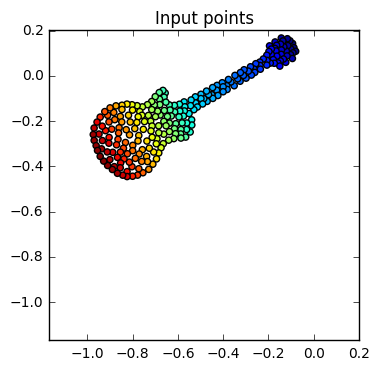

In [7]:
# S=sorted, C=colored, R=rotated, N=normalized, V=variance adjusted
#sel_points = np.random.randint(low=0, high=points_list.shape[0], size=int(points_list.shape[0]/3))
#points_list = points_list[sel_points]
Spts = np.array(sorted(points_list, key=lambda x: x[1], reverse=False))
SCpts = np.array([[Spts[i][0], Spts[i][1], i] for i in range(len(Spts))])
theta = math.pi * 2 * -60/180.0
# rotate the points a bit so the guitar is tilted
SCRpts = rotate_points(SCpts, theta)
plt.scatter(SCRpts[:,0], SCRpts[:,1], c=SCRpts[:,2], cmap='jet')
setup_plot(SCRpts)
plt.title("Input points")
file_helper.save_figure('eguitar-input')
plt.show()

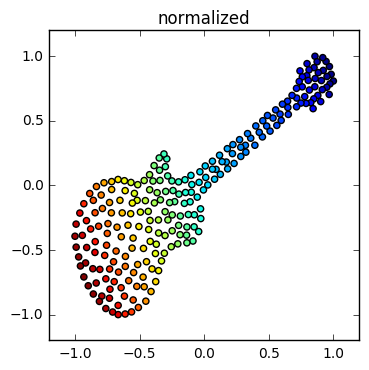

In [8]:
# N=normalized
xmin = np.min(SCRpts[:,0])
xmax = np.max(SCRpts[:,0])
ymin = np.min(SCRpts[:,1])
ymax = np.max(SCRpts[:,1])
SCRNpts = SCRpts.copy()
for i in range(SCRpts.shape[0]): 
    SCRNpts[i][0] = np.interp(SCRpts[i][0], [xmin, xmax], [-1,1])
    SCRNpts[i][1] = np.interp(SCRpts[i][1], [ymin, ymax], [-1,1])
plt.clf()
plt.scatter(SCRNpts[:,0], SCRNpts[:,1], c=SCRNpts[:,2], cmap='jet')
setup_plot(SCRNpts)
plt.title("normalized")
file_helper.save_figure('eguitar-normalized')
plt.show()

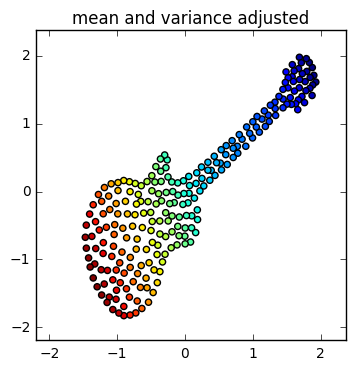

In [9]:
# V=variance (and mean) adjusted
# We'll do this explicitly to show the steps
# It would be shorter (and probably faster) to use Numpy

# compute the means and center the data
mean_scrn_x = (1/len(SCRNpts))*np.sum(SCRNpts[:,0])
mean_scrn_y = (1/len(SCRNpts))*np.sum(SCRNpts[:,1])
Mpts = []
for i in range(len(SCRNpts)):
    pt = SCRNpts[i]
    vx = pt[0]-mean_scrn_x
    vy = pt[1]-mean_scrn_y
    Mpts.append([vx, vy, pt[2]])
Mpts = np.array(Mpts)

# compute the variances and scale each feature
sigma_x = math.sqrt((1/len(Mpts))*np.sum(Mpts[:,0]**2))
sigma_y = math.sqrt((1/len(Mpts))*np.sum(Mpts[:,1]**2))
SCRNVpts = []
for i in range(len(Mpts)):
    pt = Mpts[i]
    vx = pt[0]/sigma_x
    vy = pt[1]/sigma_y
    SCRNVpts.append([vx, vy, pt[2]])
SCRNVpts = np.array(SCRNVpts)
    
plt.clf()
plt.scatter(SCRNVpts[:,0], SCRNVpts[:,1], c=SCRNVpts[:,2], cmap='jet')
setup_plot(SCRNVpts)
plt.title("mean and variance adjusted")
file_helper.save_figure('eguitar-mean-variance')
plt.show()

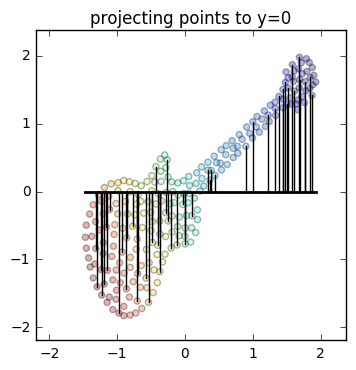

In [10]:
# project the adjusted points to the y=0 line
plt.clf()
plt.scatter(SCRNVpts[:,0], SCRNVpts[:,1], c=SCRNVpts[:,2], cmap='jet', alpha=0.3)
for i in range(SCRNVpts.shape[0]):
    if np.random.uniform() < .25:
        xyc = SCRNVpts[i]
        plt.plot([xyc[0], xyc[0]], [xyc[1], 0], lw=1, color='black')
plt.plot([np.min(SCRNVpts[:,0]), np.max(SCRNVpts[:,0])], [0,0], lw=2, color='black')
setup_plot(SCRNVpts)
plt.title("projecting points to y=0")
file_helper.save_figure('eguitar-project-y0')
plt.show()

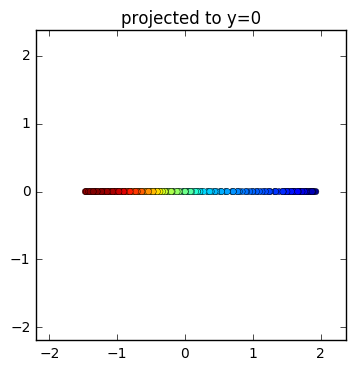

In [11]:
# show the projected points
plt.clf()
plt.scatter(SCRNVpts[:,0], SCRNVpts.shape[0]*[0], c=SCRNVpts[:,2], lw=.3, cmap='jet')
setup_plot(SCRNVpts)
plt.title("projected to y=0")
file_helper.save_figure('eguitar-projected-to-y0')
plt.show()

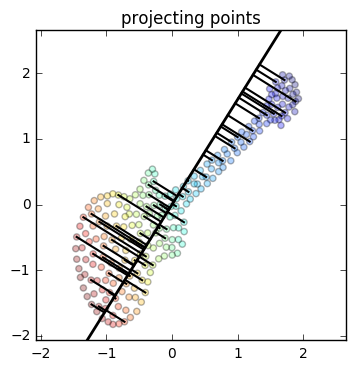

In [12]:
# projected onto the line we found by PCA
plt.clf()
ptheta = math.pi * 2 * 29/180.0
dx = math.cos(ptheta)
dy = math.sin(ptheta)
plt.scatter(SCRNVpts[:,0], SCRNVpts[:,1], c=SCRNVpts[:,2], cmap='jet', alpha=0.3)
SCRNVPpts = SCRNVpts.copy()
plt.plot([-10*dx, 10*dx], [-10*dy, 10*dy], lw=2, color='black')
for i in range(SCRNVpts.shape[0]):
    xyc = SCRNVpts[i]
    plen = math.sqrt((xyc[0]*xyc[0])+(xyc[1]*xyc[1]))
    normp = [xyc[0]/plen, xyc[1]/plen]
    dot = (dx * xyc[0])+(dy * xyc[1])
    SCRNVPpts[i][0] = dx*dot
    SCRNVPpts[i][1] = dy*dot
for i in range(SCRNVpts.shape[0]):
    if np.random.uniform() < .25:
        plt.plot([SCRNVpts[i][0], SCRNVPpts[i][0]], 
                 [SCRNVpts[i][1], SCRNVPpts[i][1]], lw=1.5, color='black')
setup_plot(SCRNVPpts)
plt.title("projecting points")
file_helper.save_figure('eguitar-projected-tilted')
plt.show()

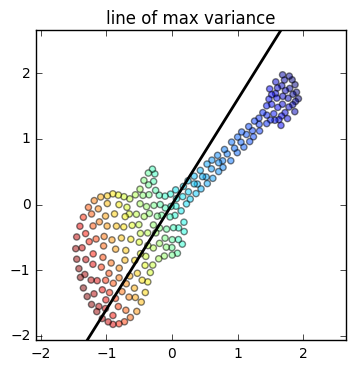

In [13]:
# show the line we found by PCA
plt.clf()
ptheta = math.pi * 2 * 29/180.0
dx = math.cos(ptheta)
dy = math.sin(ptheta)
plt.scatter(SCRNVpts[:,0], SCRNVpts[:,1], c=SCRNVpts[:,2], cmap='jet', alpha=0.5)
plt.plot([-10*dx, 10*dx], [-10*dy, 10*dy], lw=2, color='black')
setup_plot(SCRNVPpts)
plt.title("line of max variance")
file_helper.save_figure('eguitar-max-variance')
plt.show()

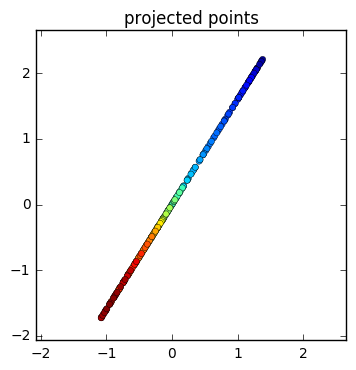

In [14]:
# show the projected points
plt.clf()
plt.scatter(SCRNVPpts[:,0], SCRNVPpts[:,1], c=SCRNVPpts[:,2], lw=.3, cmap='jet')
setup_plot(SCRNVPpts)
plt.title("projected points")
file_helper.save_figure('eguitar-rot-line')
plt.show()

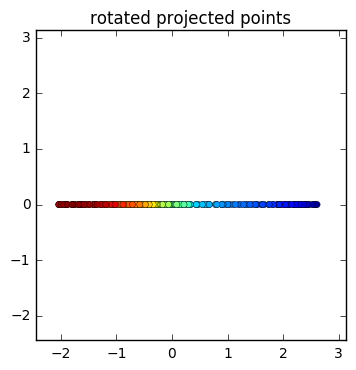

In [15]:
plt.clf()
line_pts = rotate_points(SCRNVPpts, ptheta)
plt.scatter(line_pts[:,0], line_pts[:,1], c=line_pts[:,2], lw=.3, cmap='jet')
setup_plot(line_pts)
plt.title("rotated projected points")
file_helper.save_figure('eguitar-unrot-line')
plt.show()

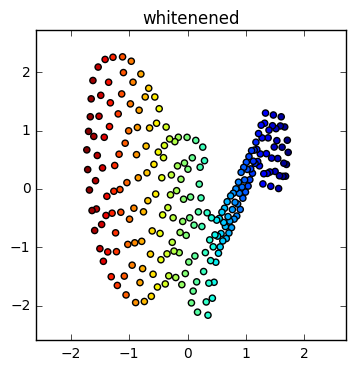

In [16]:
from sklearn.decomposition import PCA
Wpts = SCRNpts.copy()
pca = PCA(n_components=2, whiten=True)
pca.fit(Wpts)
PCAW = pca.transform(Wpts)
plt.clf()
plt.scatter(PCAW[:,0], PCAW[:,1], c=SCRNpts[:,2], cmap='jet')
setup_plot(PCAW)
plt.title("whitenened")
file_helper.save_figure('eguitar-whitened')
plt.show()

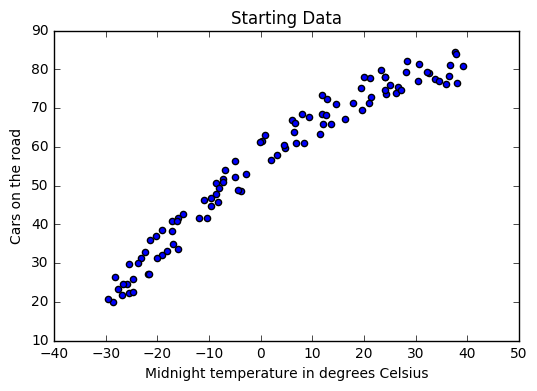

In [17]:
np.random.seed(42)
num_points = 100
temp_lo = -30
temp_hi = 40
cars_lo = 20
cars_hi = 80
temps = np.random.uniform(low=temp_lo, high=temp_hi, size=num_points)
cars = np.zeros(num_points)
for i in range(num_points):
    sint = math.sin(np.interp(temps[i], [temp_lo, temp_hi], [0, math.pi/2]))
    cars[i] = np.interp(sint, [0,1], [cars_lo, cars_hi]) + np.random.uniform(-5, 5)
plt.scatter(temps, cars)
plt.xlabel('Midnight temperature in degrees Celsius')
plt.ylabel('Cars on the road')
plt.title("Starting Data")
file_helper.save_figure('raw-traffic-data')
plt.show()

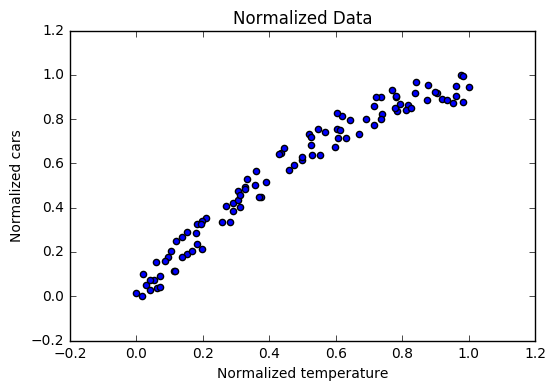

In [18]:
ntemps = np.interp(temps, [np.min(temps), np.max(temps)], [0,1])
ncars = np.interp(cars, [np.min(cars), np.max(cars)], [0,1])
plt.scatter(ntemps, ncars)
plt.xlabel('Normalized temperature')
plt.ylabel('Normalized cars')
plt.title("Normalized Data")
file_helper.save_figure('scaled-traffic-data')
plt.show()